In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_5_descriptive = get_prompt("descriptive", 5)
prompt_5_natural = get_prompt("natural", 5)

prompt_5_descriptive, prompt_5_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time.',
 'Simulate 1LYZ for 1 ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD and radius of gyration of the simulation.')

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_5_descriptive)

Thought: I'll help complete these tasks step by step. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have the PDB file, let's continue with analyzing the secondary structure using ComputeDSSP.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_224349",
        "target_frames": "first"
    }
}
```

Thought: Let's continue with setting up and running the simulation for 1 ps at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_224349",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_224349: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_224349
 rec0_224352: dssp values for trajectory with id: 1LYZ_224349
 1LYZ_224405: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_224411: Initial positions for simulation sim0_224411
 sim0_224411: Basic Simulation of Protein 1LYZ_224405
 rec0_224415: Simulation trajectory for protein 1LYZ_224405 and simulation sim0_224411
 rec1_224415: Simulation state log for protein 1LYZ_224405 and simulation sim0_224411
 rec2_224415: Simulation pdb frames for protein 1LYZ_224405 and simulation sim0_224411
 rmsd_224411: RMSD for 224411
 fig0_224919: RMSD plot for 224411
 rgy_rec0_224415: Radii of gyration per frame for rec0_224415
 fig0_224931: Plot of radii of gyration over time for rec0_224415


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_224349"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_224349", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_224415")
top_path_1 = registry_1.get_mapped_path("top_sim0_224411")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

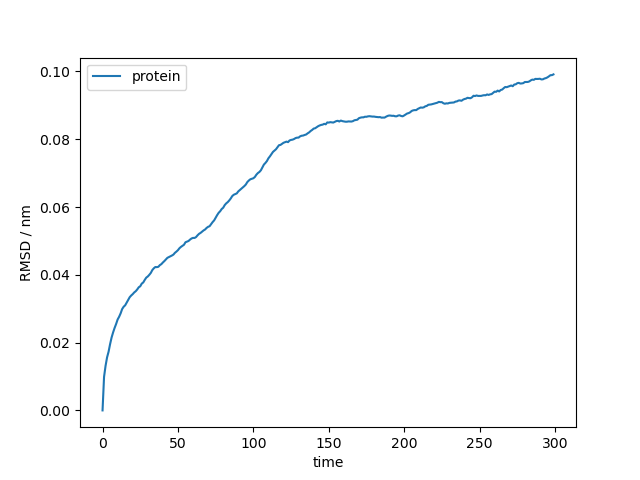

In [10]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_224919'))

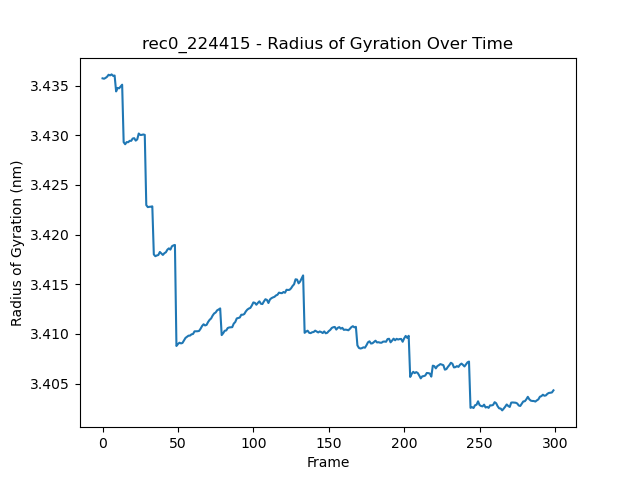

In [9]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_224931'))

In [11]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_5_natural)

Thought: Let me break this down into steps:
1. First, I need to download the PDB file for 1LYZ
2. Then I'll need to clean it and prepare it for simulation
3. Run a simulation
4. Analyze the secondary structure
5. Calculate RMSD and radius of gyration

Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: I see the PDB file has been downloaded. Now I need to clean it and prepare it for simulation. Let me use the cleaning tool to prepare the structure.

Action:
```
{
    "action": "CleaningToolFunction",
    "action_input": {
        "pdb_id": "1LYZ_225036",
        "replace_nonstandard_residues": true,
        "add_missing_atoms": true,
        "remove_heterogens": true,
        "remove_water": true,
        "add_hydrogens": true,
        "add_hydrogens_ph": 7.0
    }
}
```

file path: /Users/samanthacox/Desktop/md-agent/ckpt/ckpt_52/pdb/1LYZ_raw_20250122_225036.pdb
Thought:

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [12]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_225036: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_225036
 1LYZ_225040: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_225047: Initial positions for simulation sim0_225047
 sim0_225047: Basic Simulation of Protein 1LYZ_225040
 rec0_225051: Simulation trajectory for protein 1LYZ_225040 and simulation sim0_225047
 rec1_225051: Simulation state log for protein 1LYZ_225040 and simulation sim0_225047
 rec2_225051: Simulation pdb frames for protein 1LYZ_225040 and simulation sim0_225047
 rec0_225733: dssp values for trajectory with id: rec0_225051
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_225738: RMSD plot for 1LYZ
 rgy_rec0_225051: Radii of gyration per frame for rec0_225051
 fig0_225744: Plot of radii of gyration over time for rec0_225051


In [13]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_225036"))

In [14]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_225036", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [15]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_225051")
top_path_2 = registry_2.get_mapped_path("top_sim0_225047")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

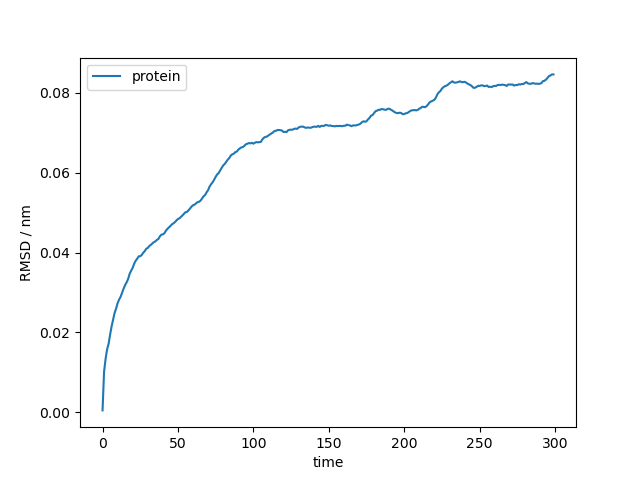

In [17]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_225738'))

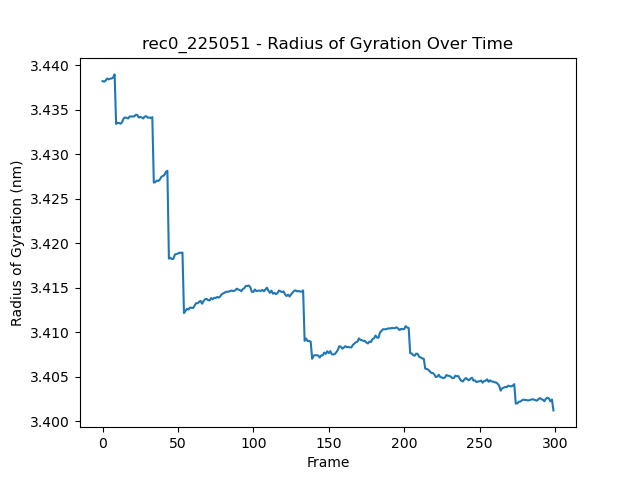

In [16]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_225744'))